# 0. Install and Import Dependencies

In [ ]:
#!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python matplotlib

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib
!pip install numpy scipy matplotlib pandas sympy nose Shapely

In [ ]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [ ]:
#Download Model on Lniux
!wget -q -O lite-model_movenet_singlepose_lightning_3.tflite https://tfhub.dev/google/lite-model/movenet/singlepose/lightning/3?lite-format=tflite

In [ ]:
#Download Model on Windows
import requests
url= "https://tfhub.dev/google/lite-model/movenet/singlepose/lightning/3?lite-format=tflite"
r= requests.get(url, allow_redirects=True)
open('lite-model_movenet_singlepose_lightning_3.tflite', 'wb').write(r.content)

# 1. Load Model

In [ ]:
interpreter = tf.lite.Interpreter(model_path='lite-model_movenet_singlepose_lightning_3.tflite')
interpreter.allocate_tensors()

# Orignal Code

# 2. Make Detections

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Reshape image
    img = frame.copy()
    img = tf.image.resize_with_pad(np.expand_dims(img, axis=0), 192,192)
    input_image = tf.cast(img, dtype=tf.float32)
    
    # Setup input and output 
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    
    # Make predictions 
    interpreter.set_tensor(input_details[0]['index'], np.array(input_image))
    interpreter.invoke()
    keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
    
    # Rendering 
    draw_connections(frame, keypoints_with_scores, EDGES, 0.4)
    draw_keypoints(frame, keypoints_with_scores, 0.4)
    
    cv2.imshow('MoveNet Lightning', frame)
    
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

# 3. Draw Keypoints

In [ ]:
def draw_keypoints(frame, keypoints, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    marker_name= ['nose', 'left eye','right eye', 'left ear', 'right ear', 'left shoulder', 'right shoulder', 'left elbow', 'right elbow', 'left wrist','right wrist', 'left hip', 'right hip', 'left knee', 'right knee', 'left ankle', 'right ankle']
    marker_count=0
    
    for kp in shaped:
        ky, kx, kp_conf = kp
        if kp_conf > confidence_threshold:
            cv2.circle(frame, (int(kx), int(ky)), 4, (0,255,0), -1) 
            cv2.putText(frame, marker_name[marker_count], (int(kx), int(ky)), cv2.FONT_HERSHEY_PLAIN, 2, (255,255,255),2,cv2.LINE_AA)
            marker_count=marker_count+1
            
            #cv2.putText(image, text, org, font, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])

# 4. Draw Edges

In [ ]:
EDGES = {
    (0, 1): 'm',
    (0, 2): 'c',
    (1, 3): 'm',
    (2, 4): 'c',
    (0, 5): 'm',
    (0, 6): 'c',
    (5, 7): 'm',
    (7, 9): 'm',
    (6, 8): 'c',
    (8, 10): 'c',
    (5, 6): 'y',
    (5, 11): 'm',
    (6, 12): 'c',
    (11, 12): 'y',
    (11, 13): 'm',
    (13, 15): 'm',
    (12, 14): 'c',
    (14, 16): 'c'
}

In [ ]:
def draw_connections(frame, keypoints, edges, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for edge, color in edges.items():
        p1, p2 = edge
        y1, x1, c1 = shaped[p1]
        y2, x2, c2 = shaped[p2]
        
        if (c1 > confidence_threshold) & (c2 > confidence_threshold):      
            cv2.line(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0,0,255), 2)

# Modified Code by Mohit

# 2. Draw Keypoints

In [ ]:
def draw_keypoints(frame, keypoints, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    marker_name= ['nose', 'left eye','right eye', 'left ear', 'right ear', 'left shoulder', 'right shoulder', 'left elbow', 'right elbow', 'left wrist','right wrist', 'left hip', 'right hip', 'left knee', 'right knee', 'left ankle', 'right ankle']
    marker_count=0
    
    for kp in shaped:
        ky, kx, kp_conf = kp
        if kp_conf > confidence_threshold:
            cv2.circle(frame, (int(kx), int(ky)), 4, (0,255,0), -1) 
            # put text on markers
#             cv2.putText(frame, marker_name[marker_count], (int(kx), int(ky)), cv2.FONT_HERSHEY_PLAIN, 2, (255,255,255),2,cv2.LINE_AA)
            cv2.putText(frame, str(marker_count), (int(kx), int(ky)), cv2.FONT_HERSHEY_PLAIN, 2, (255,255,255),2,cv2.LINE_AA)
            marker_count=marker_count+1
            
            #cv2.putText(image, text, org, font, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])

# 3. Draw Edges

In [ ]:
EDGES = {
    (0, 1): 'm',
    (0, 2): 'c',
    (1, 3): 'm',
    (2, 4): 'c',
    (0, 5): 'm',
    (0, 6): 'c',
    (5, 7): 'm',
    (7, 9): 'm',
    (6, 8): 'c',
    (8, 10): 'c',
    (5, 6): 'y',
    (5, 11): 'm',
    (6, 12): 'c',
    (11, 12): 'y',
    (11, 13): 'm',
    (13, 15): 'm',
    (12, 14): 'c',
    (14, 16): 'c'
}

In [ ]:
def draw_connections(frame, keypoints, edges, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for edge, color in edges.items():
        p1, p2 = edge
        y1, x1, c1 = shaped[p1]
        y2, x2, c2 = shaped[p2]
        
        if (c1 > confidence_threshold) & (c2 > confidence_threshold):      
            cv2.line(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0,0,255), 2)

In [ ]:
# List camera devices

index = 0
arr = []
while True:
    cap = cv2.VideoCapture(index)
    if not cap.read()[0]:
        break
    else:
        arr.append(index)
    cap.release()
    index += 1
print(arr)

# 4. Make Detections - Mohit Version for black screen

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Reshape image
    img = frame.copy()
    
    #width, height = img.size
    #print(width, height)
    
    img = tf.image.resize_with_pad(np.expand_dims(img, axis=0), 192, 192)
    input_image = tf.cast(img, dtype=tf.float32)
    
    # Setup input and output 
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    
    # Make predictions 
    interpreter.set_tensor(input_details[0]['index'], np.array(input_image))
    interpreter.invoke()
    keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
    
    #Rendering with background image 
    
    #Reading the background image
    image = cv2.imread(r'C:\Users\devops\PoseEstimationProject\background.jpg')
    width = 800
    height = 1100
    dim = (width, height)
    image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    #Create a black image
    img = np.zeros((512,512,3), np.uint8)
    
    draw_connections(image, keypoints_with_scores, EDGES, 0.4)
    draw_keypoints(image, keypoints_with_scores, 0.4)
        
    cv2.imshow('MoveNet Lightning', image)
    
#     # Rendering 
#     draw_connections(frame, keypoints_with_scores, EDGES, 0.4)
#     draw_keypoints(frame, keypoints_with_scores, 0.4)
    
#     cv2.imshow('MoveNet Lightning', frame)
        
    
    
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

# Update image with another sub image

In [4]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress
import cv2

from numpy import ones,vstack
from numpy.linalg import lstsq
import math

from shapely.geometry import LineString

interpreter = tf.lite.Interpreter(model_path='lite-model_movenet_singlepose_lightning_3.tflite')
interpreter.allocate_tensors()

In [82]:
#function to get corners of a square with only the coordinates of the line in middle
def get_quadCorners(x1, y1, x2, y2, factor):
    
#     print("Passing to Fn: " + str(x1) + ", " + str(x2) + ", " + str(y1) + ", " + str(y2))
    line_length = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    slope, intercept, r_value, p_value, std_err = linregress([x1,x2],[y1,y2])
    
    a = (x1, y1)
    b = (x2, y2)
    ab = LineString([a, b])
    left = ab.parallel_offset(line_length / int(factor), 'left')
    right = ab.parallel_offset(line_length / int(factor), 'right')
    
    c = left.boundary[1]
    d = right.boundary[0]
    e = left.boundary[0]
    f = right.boundary[1]
    
    points = np.array(
    [
        [c.x, c.y],
        [d.x, d.y],
        [e.x, e.y],
        [f.x, f.y],
    ])
    
#     print(slope,intercept)
    return (points)        

Passing to Fn: 4, 6, 0, 0


C:\Users\devops\AppData\Local\Temp/ipykernel_3440/3156778473.py:14: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  c = left.boundary[1]
C:\Users\devops\AppData\Local\Temp/ipykernel_3440/3156778473.py:15: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  d = right.boundary[0]
C:\Users\devops\AppData\Local\Temp/ipykernel_3440/3156778473.py:16: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  e = left.boundary[0]
C:\Users\devops\AppData\Local\Temp/ipykernel_3440/3156778473.py:17: ShapelyDeprecationWarning: __getitem__ for multi-part geometries

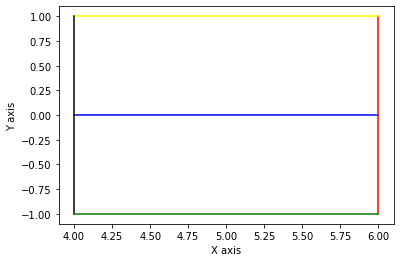

In [74]:
a, b = [[4,0], [6,0]]   # point definition
squareCorners = get_quadCorners(a[0], a[1], b[0], b[1], 2)

plt.plot([a[0],b[0]], [a[1],b[1]], color = 'blue')
plt.plot([squareCorners[0][0], squareCorners[1][0]], [squareCorners[0][1], squareCorners[1][1]], color='red')
plt.plot([squareCorners[0][0], squareCorners[2][0]], [squareCorners[0][1], squareCorners[2][1]], color='yellow')
plt.plot([squareCorners[2][0], squareCorners[3][0]], [squareCorners[2][1], squareCorners[3][1]], color='black')
plt.plot([squareCorners[1][0], squareCorners[3][0]], [squareCorners[1][1], squareCorners[3][1]], color='green')

plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

In [46]:
class all_keypoints_withnames:
  def __init__(self, x, y, confidence, name):
    self.x = x
    self.y = y
    self.confidence = confidence
    self.name = name

In [63]:
marker_name = ['nose', 'left eye','right eye', 'left ear', 'right ear', 'left shoulder', 'right shoulder', 'left elbow', 'right elbow', 'left wrist','right wrist', 'left hip', 'right hip', 'left knee', 'right knee', 'left ankle', 'right ankle']  
count = 0
for m in marker_name:
    print(str(count) + ": " + m)
    count=count+1

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle


In [158]:
def keypoints_modification(frame, keypoints):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    shaped_modified = np.empty(shape=(53, 4), dtype=all_keypoints_withnames)
    
    marker_name = ['nose', 'left eye','right eye', 'left ear', 'right ear', 'left shoulder', 'right shoulder', 'left elbow', 'right elbow', 'left wrist','right wrist', 'left hip', 'right hip', 'left knee', 'right knee', 'left ankle', 'right ankle']  
    marker_count = 0
    leg_factor= 3
    hand_factor= 4
    
    for kp in shaped:
        ky, kx, kp_conf = kp
        
        shaped_modified[marker_count] = [ky, kx, kp_conf, marker_name[marker_count]]  # getting new keypoints array populated with inital points            
        marker_count=marker_count+1

    # Custom points displayed and added in the list for FACE square
    squareCorners = get_quadCorners(shaped_modified[3][1], shaped_modified[3][0], shaped_modified[4][1], shaped_modified[4][0], 2)
    # Adding new keypoints for face square
    shaped_modified[17] = [squareCorners[0][1], squareCorners[0][0], shaped_modified[3][2], "face top right"] 
    shaped_modified[18] = [squareCorners[1][1], squareCorners[1][0], shaped_modified[3][2], "face bottom right"]
    shaped_modified[19] = [squareCorners[2][1], squareCorners[2][0], shaped_modified[3][2], "face top left"]
    shaped_modified[20] = [squareCorners[3][1], squareCorners[3][0], shaped_modified[3][2], "face bottom left"]

    # Custom points displayed and added in the list for left bicep rectangle
    squareCorners = get_quadCorners(shaped_modified[5][1], shaped_modified[5][0], shaped_modified[7][1], shaped_modified[7][0], hand_factor)
    # Adding new keypoints for face square
    shaped_modified[21] = [squareCorners[0][1], squareCorners[0][0], shaped_modified[5][2], "left bicep bottom right"] 
    shaped_modified[22] = [squareCorners[1][1], squareCorners[1][0], shaped_modified[5][2], "left bicep bottom left"]
    shaped_modified[23] = [squareCorners[2][1], squareCorners[2][0], shaped_modified[5][2], "left bicep top right"]
    shaped_modified[24] = [squareCorners[3][1], squareCorners[3][0], shaped_modified[5][2], "left bicep top left"]

    # Custom points displayed and added in the list for left forearm rectangle
    squareCorners = get_quadCorners(shaped_modified[7][1], shaped_modified[7][0], shaped_modified[9][1], shaped_modified[9][0], hand_factor)
    # Adding new keypoints for face square
    shaped_modified[25] = [squareCorners[0][1], squareCorners[0][0], shaped_modified[7][2], "left forearm bottom right"] 
    shaped_modified[26] = [squareCorners[1][1], squareCorners[1][0], shaped_modified[7][2], "left forearm bottom left"]
    shaped_modified[27] = [squareCorners[2][1], squareCorners[2][0], shaped_modified[7][2], "left forearm top right"]
    shaped_modified[28] = [squareCorners[3][1], squareCorners[3][0], shaped_modified[7][2], "left forearm top left"]

    # Custom points displayed and added in the list for right bicep rectangle
    squareCorners = get_quadCorners(shaped_modified[6][1], shaped_modified[6][0], shaped_modified[8][1], shaped_modified[8][0], hand_factor)
    # Adding new keypoints for face square
    shaped_modified[29] = [squareCorners[0][1], squareCorners[0][0], shaped_modified[6][2], "right bicep bottom right"] 
    shaped_modified[30] = [squareCorners[1][1], squareCorners[1][0], shaped_modified[6][2], "right bicep bottom left"]
    shaped_modified[31] = [squareCorners[2][1], squareCorners[2][0], shaped_modified[6][2], "right bicep top right"]
    shaped_modified[32] = [squareCorners[3][1], squareCorners[3][0], shaped_modified[6][2], "right bicep top left"]

    # Custom points displayed and added in the list for right forearm rectangle
    squareCorners = get_quadCorners(shaped_modified[8][1], shaped_modified[8][0], shaped_modified[10][1], shaped_modified[10][0], hand_factor)
    # Adding new keypoints for face square
    shaped_modified[33] = [squareCorners[0][1], squareCorners[0][0], shaped_modified[8][2], "right forearm bottom right"] 
    shaped_modified[34] = [squareCorners[1][1], squareCorners[1][0], shaped_modified[8][2], "right forearm bottom left"]
    shaped_modified[35] = [squareCorners[2][1], squareCorners[2][0], shaped_modified[8][2], "right forearm top right"]
    shaped_modified[36] = [squareCorners[3][1], squareCorners[3][0], shaped_modified[8][2], "right forearm top left"]

    # Custom points displayed and added in the list for left thigh rectangle
    squareCorners = get_quadCorners(shaped_modified[11][1], shaped_modified[11][0], shaped_modified[13][1], shaped_modified[13][0], leg_factor)
    # Adding new keypoints for face square
    shaped_modified[37] = [squareCorners[0][1], squareCorners[0][0], shaped_modified[11][2], "left thigh bottom right"] 
    shaped_modified[38] = [squareCorners[1][1], squareCorners[1][0], shaped_modified[11][2], "left thigh bottom left"]
    shaped_modified[39] = [squareCorners[2][1], squareCorners[2][0], shaped_modified[11][2], "left thigh top right"]
    shaped_modified[40] = [squareCorners[3][1], squareCorners[3][0], shaped_modified[11][2], "left thigh top left"]

    # Custom points displayed and added in the list for left calf rectangle
    squareCorners = get_quadCorners(shaped_modified[13][1], shaped_modified[13][0], shaped_modified[15][1], shaped_modified[15][0], leg_factor)
    # Adding new keypoints for face square
    shaped_modified[41] = [squareCorners[0][1], squareCorners[0][0], shaped_modified[13][2], "left calf bottom right"] 
    shaped_modified[42] = [squareCorners[1][1], squareCorners[1][0], shaped_modified[13][2], "left calf bottom left"]
    shaped_modified[43] = [squareCorners[2][1], squareCorners[2][0], shaped_modified[13][2], "left calf top right"]
    shaped_modified[44] = [squareCorners[3][1], squareCorners[3][0], shaped_modified[13][2], "left calf top left"]

    # Custom points displayed and added in the list for right thigh rectangle
    squareCorners = get_quadCorners(shaped_modified[12][1], shaped_modified[12][0], shaped_modified[14][1], shaped_modified[14][0], leg_factor)
    # Adding new keypoints for face square
    shaped_modified[45] = [squareCorners[0][1], squareCorners[0][0], shaped_modified[12][2], "right thigh bottom right"] 
    shaped_modified[46] = [squareCorners[1][1], squareCorners[1][0], shaped_modified[12][2], "right thigh bottom left"]
    shaped_modified[47] = [squareCorners[2][1], squareCorners[2][0], shaped_modified[12][2], "right thigh top right"]
    shaped_modified[48] = [squareCorners[3][1], squareCorners[3][0], shaped_modified[12][2], "right thigh top left"]

    # Custom points displayed and added in the list for right calf rectangle
    squareCorners = get_quadCorners(shaped_modified[14][1], shaped_modified[14][0], shaped_modified[16][1], shaped_modified[16][0], leg_factor)
    # Adding new keypoints for face square
    shaped_modified[49] = [squareCorners[0][1], squareCorners[0][0], shaped_modified[14][2], "right calf bottom right"] 
    shaped_modified[50] = [squareCorners[1][1], squareCorners[1][0], shaped_modified[14][2], "right calf bottom left"]
    shaped_modified[51] = [squareCorners[2][1], squareCorners[2][0], shaped_modified[14][2], "right calf top right"]
    shaped_modified[52] = [squareCorners[3][1], squareCorners[3][0], shaped_modified[14][2], "right calf top left"]

#     print((shaped_modified))
#     count = 0
#     for sm in shaped_modified:
#         print(str(count) + ": " + str(sm[3]))
#         count = count + 1 
    return shaped_modified

In [140]:
def draw_keypoints(frame, keypoints, confidence_threshold):
    y, x, c = frame.shape
    
    marker_count = 0
    
    for kp in keypoints:
        ky, kx, kp_conf, kp_name = kp
        
        if kp_conf > confidence_threshold:
#             if (not (marker_count in list(range(17)))):
            if(marker_count in [17,18,19,20]):
                cv2.circle(frame, (int(kx), int(ky)), 4, (0,255,0), -1) 
                # put text on markers
                cv2.putText(frame, str(kp_name), (int(kx), int(ky)), cv2.FONT_HERSHEY_PLAIN, 2, (255,255,255),2,cv2.LINE_AA)
#             cv2.putText(frame, str(str(int(kx)) + ',' + str(int(kx))), (int(kx), int(ky)), cv2.FONT_HERSHEY_PLAIN, 2, (255,255,255),2,cv2.LINE_AA)
#             cv2.putText(frame, marker_name[marker_count], (int(kx), int(ky)), cv2.FONT_HERSHEY_PLAIN, 2, (255,255,255),2,cv2.LINE_AA)

        marker_count=marker_count+1

In [159]:
myframe = cv2.imread(r'C:\Users\devops\PoseEstimationProject\fb1.jpeg')
# plt.imshow(myframe)
img = myframe.copy()
new_keypoints = keypoints_modification(frame, keypoints_with_scores)
draw_keypoints(img, new_keypoints, 0.4)

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ

C:\Users\devops\AppData\Local\Temp/ipykernel_3440/1626967186.py:14: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  c = left.boundary[1]
C:\Users\devops\AppData\Local\Temp/ipykernel_3440/1626967186.py:15: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  d = right.boundary[0]
C:\Users\devops\AppData\Local\Temp/ipykernel_3440/1626967186.py:16: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  e = left.boundary[0]
C:\Users\devops\AppData\Local\Temp/ipykernel_3440/1626967186.py:17: ShapelyDeprecationWarning: __getitem__ for multi-part geometries

In [168]:
BOX_EDGES = {
    (17, 18): 'm',
    (18, 20): 'c',
    (20, 19): 'm',
    (17, 19): 'c',
    (18, 6): 'm',
    (20, 5): 'c',
    (5, 6): 'm',
    (5, 40): 'm',
    (6, 47): 'c',
    (40, 47): 'c',
    
    (23, 24): 'y',
    (21, 22): 'm',
    (22, 24): 'c',
    (21, 23): 'y',    
    (25, 26): 'm',
    (27, 28): 'm',
    (25, 27): 'c',
    (26, 28): 'c',
    
    (29, 30): 'y',
    (31, 32): 'm',
    (29, 31): 'c',
    (30, 32): 'y',
    (33, 34): 'm',
    (35, 36): 'm',
    (33, 35): 'c',
    (34, 36): 'c',

    (37, 38): 'y',
    (39, 40): 'm',
    (37, 39): 'c',
    (38, 40): 'y',
    (41, 42): 'm',
    (43, 44): 'm',
    (41, 43): 'c',
    (42, 44): 'c',
    
    (45, 46): 'y',
    (47, 48): 'm',
    (45, 47): 'c',
    (46, 48): 'y',
    (49, 50): 'm',
    (51, 52): 'm',
    (49, 51): 'c',
    (50, 52): 'c',
}
        
EDGES = {
    (0, 1): 'm',
    (0, 2): 'c',
    (1, 3): 'm',
    (2, 4): 'c',
    (0, 5): 'm',
    (0, 6): 'c',
    (5, 7): 'm',
    (7, 9): 'm',
    (6, 8): 'c',
    (8, 10): 'c',
    (5, 6): 'y',
    (5, 11): 'm',
    (6, 12): 'c',
    (11, 12): 'y',
    (11, 13): 'm',
    (13, 15): 'm',
    (12, 14): 'c',
    (14, 16): 'c'
}

def draw_connections(frame, keypoints, edges, confidence_threshold):
    y, x, c = frame.shape
    
    for edge, color in edges.items():
        p1, p2 = edge
        y1, x1, c1, n1 = keypoints[p1]
        y2, x2, c2, n2 = keypoints[p2]
        
        if (c1 > confidence_threshold) & (c2 > confidence_threshold):      
            cv2.line(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0,0,255), 2)
            

(512, 512, 3)


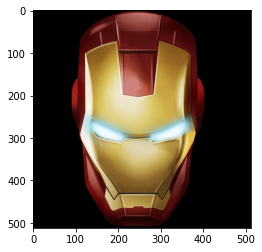

In [98]:
headimg = cv2.imread(r'C:\Users\devops\PoseEstimationProject\head.jpg', cv2.IMREAD_COLOR)
headimg= cv2.cvtColor(headimg, cv2.COLOR_BGR2RGB)
print(headimg.shape)
plt.imshow(headimg)

C:\Users\devops\AppData\Local\Temp/ipykernel_3440/1626967186.py:14: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  c = left.boundary[1]
C:\Users\devops\AppData\Local\Temp/ipykernel_3440/1626967186.py:15: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  d = right.boundary[0]
C:\Users\devops\AppData\Local\Temp/ipykernel_3440/1626967186.py:16: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  e = left.boundary[0]
C:\Users\devops\AppData\Local\Temp/ipykernel_3440/1626967186.py:17: ShapelyDeprecationWarning: __getitem__ for multi-part geometries

#################
[[140.109523370862 355.61649736762047 0.0284673273563385 'nose']
 [242.68241822719574 762.2233383059502 0.2514094114303589 'left eye']
 [244.20160460472107 757.4533948898315 0.24071332812309265 'right eye']
 [244.0684954226017 767.2561361193657 0.21681973338127136 'left ear']
 [105.38237634301186 379.5420989692211 0.05635058879852295 'right ear']
 [259.7467488348484 768.3815031051636 0.15033411979675293 'left shoulder']
 [122.39238792657852 328.4391265511513 0.022963136434555054
  'right shoulder']
 [197.97560960054398 192.30980598926544 0.23366117477416992 'left elbow']
 [203.4366246163845 197.07675457000732 0.17785385251045227 'right elbow']
 [502.5668717622757 57.91017563641071 0.32957249879837036 'left wrist']
 [492.7537402510643 63.26715286076069 0.17627432942390442 'right wrist']
 [361.01406848430634 487.0772612094879 0.05440297722816467 'left hip']
 [306.83286398649216 379.7262813448906 0.045691221952438354 'right hip']
 [201.9211835861206 183.85423386096954 0.

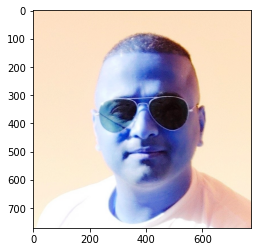

In [90]:
myframe = cv2.imread(r'C:\Users\devops\PoseEstimationProject\fb1.jpeg')
plt.imshow(myframe)
img = myframe.copy()
draw_keypoints(img, keypoints_with_scores, 0.4)

In [169]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Reshape image
    img = frame.copy()
    
    #width, height = img.size
    #print(width, height)
    
    img = tf.image.resize_with_pad(np.expand_dims(img, axis=0), 192, 192)
    input_image = tf.cast(img, dtype=tf.float32)
    
    # Setup input and output 
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    
    # Make predictions 
    interpreter.set_tensor(input_details[0]['index'], np.array(input_image))
    interpreter.invoke()
    keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
    
#     #Rendering with background image, using black image
#     img = np.zeros((512,512,3), np.uint8)
    
#     draw_connections(img, keypoints_with_scores, EDGES, 0.4)
#     draw_keypoints(img, keypoints_with_scores, 0.4)
#     keypoints_modification(frame, keypoints_with_scores)

#     cv2.imshow('MoveNet Lightning', img)
    
    # Rendering with orignal frame
#     draw_connections(frame, keypoints_with_scores, EDGES, 0.4)
#     draw_keypoints(frame, keypoints_with_scores, 0.4)

    new_keypoints = keypoints_modification(frame, keypoints_with_scores)
    
    draw_connections(frame, new_keypoints, BOX_EDGES, 0.4)
    draw_keypoints(frame, new_keypoints, 0.4)
    
    cv2.imshow('MoveNet Lightning', frame)
    
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

C:\Users\devops\AppData\Local\Temp/ipykernel_3440/1626967186.py:14: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  c = left.boundary[1]
C:\Users\devops\AppData\Local\Temp/ipykernel_3440/1626967186.py:15: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  d = right.boundary[0]
C:\Users\devops\AppData\Local\Temp/ipykernel_3440/1626967186.py:16: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  e = left.boundary[0]
C:\Users\devops\AppData\Local\Temp/ipykernel_3440/1626967186.py:17: ShapelyDeprecationWarning: __getitem__ for multi-part geometries

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle
17: face top right
18: face bottom right
19: face top left
20: face bottom left
21: left bicep bottom right
22: left bicep bottom left
23: left bicep top right
24: left bicep top left
25: left forearm bottom right
26: left forearm bottom left
27: left forearm top right
28: left forearm top left
29: right bicep bottom right
30: right bicep bottom left
31: right bicep top right
32: right bicep top left
33: right forearm bottom right
34: right forearm bottom left
35: right forearm top right
36: right forearm top left
37: left thigh bottom right
38: left thigh bottom left
39: left thigh top right
40: left thigh top left
41: left calf bottom right
42: left calf bottom left
43: left calf top right
44: left calf top left
45: right thigh bottom right
46: righ